In [29]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import cmath
import scipy as sp
%matplotlib inline

In [2]:
N = 100                               # Number of points in each direction
x_start, x_end = -1.0, 1.0            # x-direction boundaries
y_start, y_end = -1.5, 1.5            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [3]:
u_inf = 1.0     # free-stream speed

# calculates the free-stream velocity components
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

In [18]:
class Source:
    """Contains information related to a source/sink."""
    def __init__(self, strength, x, y):
        """Initializes the source/sink.
        
        Arguments
        ---------
        strength -- strength of the source/sink.
        x, y -- coordinates of the source/sink.
        """
        self.strength = strength
        self.x, self.y = x, y

    def velocity(self, X, Y):
        """Computes the velocity field generated by the source/sink.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.u = self.strength/(2*np.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*np.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)

    def stream_function(self, X, Y):
        """Computes the stream-function generated by the source/sink.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.psi = self.strength/(2*np.pi)*np.arctan2((Y-self.y), (X-self.x))

Now you'll really see how useful classes are! We will use our class `Source` to create as many sources as we want to place on a source sheet. Pick a number, `N_sources`, and call the class constructor that many times, moving along the $y$ axis for the location of the sources. Then call the function to calculate the velocity of each source.

In [19]:
N_sources = 11                                # number of sources
strength = 5.0                                # sum of all source strengths
strength_source = strength/N_sources          # strength of one source
x_source = np.zeros(N_sources, dtype=float)   # horizontal position of all sources (1D array)
y_source = np.linspace(-1.0, 1.0, N_sources)  # vertical position of all sources (1D array)

# creates a source line (Numpy array of Source's instantiations)
sources = np.empty(N_sources, dtype=object)
for i in range(N_sources):
    sources[i] = Source(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)

# superposition of all sources to the free-stream flow
u = u_freestream.copy()
v = v_freestream.copy()
for source in sources:
    u += source.u
    v += source.v

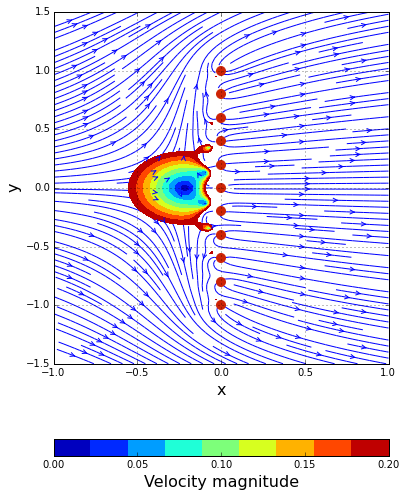

In [25]:
# plots the streamlines

size = 6
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')
velocity = plt.contourf(X, Y, np.sqrt(u**2+v**2), levels=np.linspace(0.0, 0.2, 10))
cbar = plt.colorbar(velocity, ticks=[0, 0.05, 0.1, 0.15, 0.2], orientation='horizontal')
cbar.set_label('Velocity magnitude', fontsize=16);

### Infinite line of sources

In [44]:
from scipy import integrate

sigma = 2.0    # strength of the source-sheet

# boundaries of the source-sheet
y_min, y_max = -1.0, 1.0

# computes the velcity field generated by the source-sheet
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : X[i,j]/(X[i,j]**2+(Y[i,j]-s)**2)
        u_sheet[i,j] = sigma/(2*np.pi)*sp.integrate.quad(integrand, y_min, y_max)[0]
        
        integrand = lambda s: (Y[i,j]-s)/(X[i,j]**2+(Y[i,j]-s)**2)
        v_sheet[i,j] = sigma/(2*np.pi)*sp.integrate.quad(integrand, y_min, y_max)[0]

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

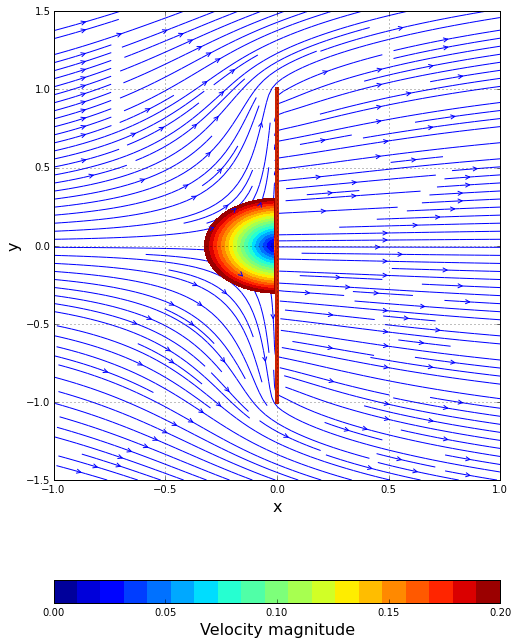

In [45]:
size = 8
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axvline(0.0, (y_min-y_start)/(y_end-y_start), (y_max-y_start)/(y_end-y_start), 
            color='#CD2305', linewidth=4)
velocity = plt.contourf(X, Y, np.sqrt(u**2+v**2), levels=np.linspace(0.0, 0.2, 20))
cbar = plt.colorbar(velocity, ticks=[0, 0.05, 0.1, 0.15, 0.2], orientation='horizontal')
cbar.set_label('Velocity magnitude', fontsize=16);